In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [3]:
sess = tf.Session()

# 创建特征和变量

In [5]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

# 1 连续型目标值的预测

## 1.1 L2损失（MSE）

In [6]:
# L = (pred - actual)^2
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

## 1.2 L1损失（绝对值的差）

In [7]:
# L = abs(pred - actual)
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

## 1.3 Pseudo-Huber Loss
它近似L1损失，类似(predicted - target)，惩罚的厉害

当预测值接近目标值时，它更接近L2损失

In [8]:
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)

# Pseudo-Huber with delta = 0.25
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

# Pseudo-Huber with delta = 5
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

### 各个损失函数图

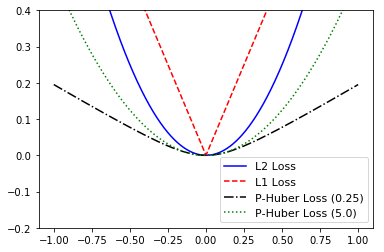

In [9]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

# 2 分类型的预测

In [10]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

## 2.1 Hinge Loss

The hinge loss is useful for categorical predictions.  Here is is the `max(0, 1-(pred*actual))`.

In [11]:
# Hinge loss
# Use for predicting binary (-1, 1) classes
# L = max(0, 1 - (pred * actual))
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

### 2.2 Cross Entropy Loss 二分类的交叉熵

The cross entropy loss is a very popular way to measure the loss between categorical targets and output model logits.  You can read about the details more here: https://en.wikipedia.org/wiki/Cross_entropy

In [13]:
# Cross entropy loss
# L = -actual * (log(pred)) - (1-actual)(log(1-pred))
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

### 2.3 Sigmoid Entropy Loss 多分类的交叉熵

In [14]:
# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
# or
# L = max(actual, 0) - actual * pred + log(1 + exp(-abs(actual)))
x_val_input = tf.expand_dims(x_vals, 1)
target_input = tf.expand_dims(targets, 1)
xentropy_sigmoid_y_vals = tf.nn.softmax_cross_entropy_with_logits(logits=x_val_input, labels=target_input)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

### 2.4  Weighted (Softmax) Cross Entropy Loss 加权的交叉熵

In [16]:
# Weighted (softmax) cross entropy loss
# L = -actual * (log(pred)) * weights - (1-actual)(log(1-pred))
# or
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

### 各个损失函数图

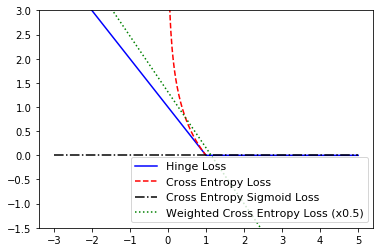

In [17]:
# Plot the output
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
#plt.xlim(-1, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

### 2.5 稀疏的多分类交叉熵

In [18]:
# Softmax entropy loss
# L = -actual * (log(softmax(pred))) - (1-actual)(log(1-softmax(pred)))
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                           labels=target_dist)
print(sess.run(softmax_xentropy))

# Sparse entropy loss
# Use when classes and targets have to be mutually exclusive
# L = sum( -actual * log(pred) )
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy =  tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                                  labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[ 1.16012561]
[ 0.00012564]


In [19]:
sess.close()